In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Building an Image Classifier
First let's install and import TensorFlow and Keras

> conda install tensorflow

> conda install pip 

> pip install --upgrade tensorflow==2.0.0-rc1

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.2.4-tf'

In [4]:
tf.__version__


'2.0.0-rc1'

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

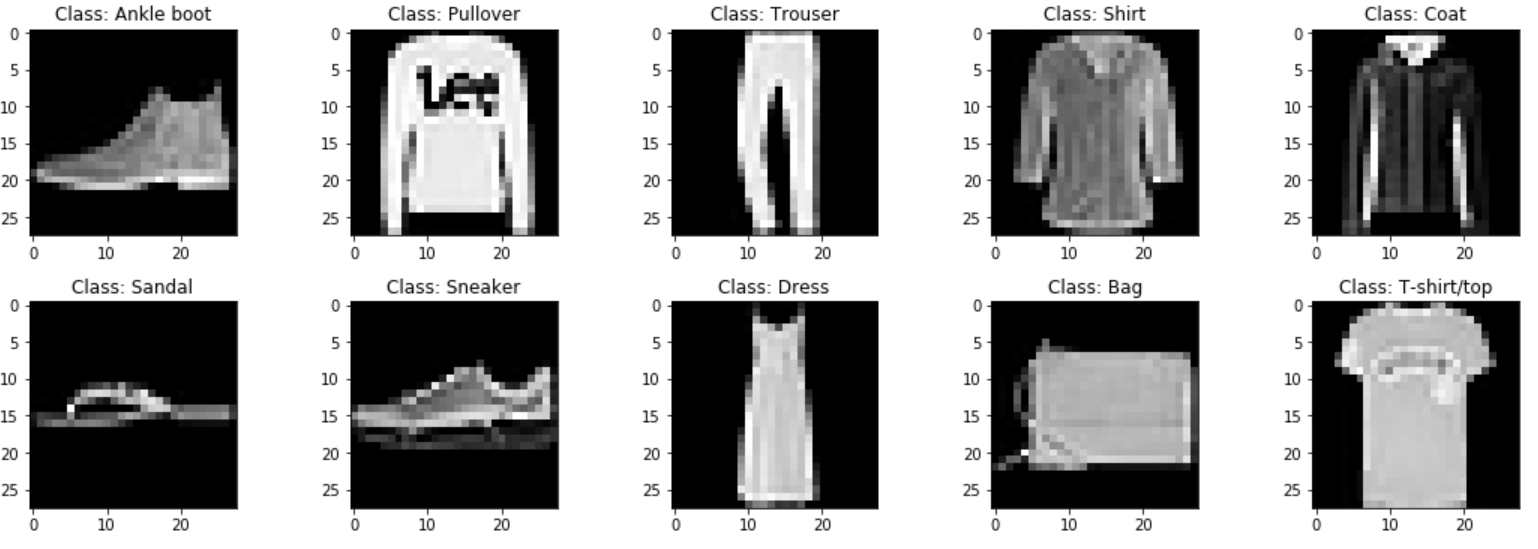

### Usage:
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns:
2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

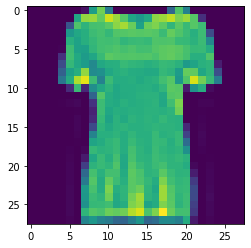

In [6]:
plt.imshow(X_train_full[10])

In [7]:
y_train_full[0]

9

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train_full[10]]

'T-shirt/top'

In [10]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

### Data normalization
We then normalize the data dimensions so that they are of approximately the same scale.

In [11]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:

* __Training data__ — used for training the model
* __Validation data__ — used for tuning the hyperparameters and evaluate the models
* __Test data__ — used to test the model after the model has gone through initial vetting by the validation set.

In [12]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [13]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Create the model architecture
There are two APIs for defining a model in Keras:
* Sequential model API
* Functional API

![](Seq_api.png "Title")

![](Functional.JPG "Title")

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

![](Structure.jpg "Title")

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


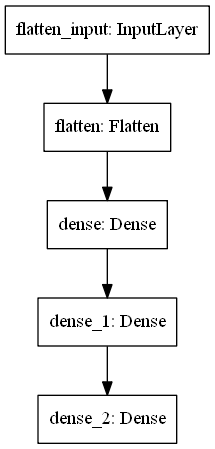

In [17]:
import pydot
keras.utils.plot_model(model)

We can access the parameters using get_weight() method

In [18]:
weights, biases = model.layers[1].get_weights()

In [19]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

Documentation - https://keras.io/models/sequential/

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [24]:
model_history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 95us/sample - loss: 0.7228 - accuracy: 0.7623 - val_loss: 0.5304 - val_accuracy: 0.8162
Epoch 2/30
55000/55000 [==============================] - 4s 81us/sample - loss: 0.4837 - accuracy: 0.8321 - val_loss: 0.4498 - val_accuracy: 0.8444
Epoch 3/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.4379 - accuracy: 0.8472 - val_loss: 0.4172 - val_accuracy: 0.8552
Epoch 4/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.4126 - accuracy: 0.8554 - val_loss: 0.3900 - val_accuracy: 0.8650
Epoch 5/30
55000/55000 [==============================] - 4s 80us/sample - loss: 0.3928 - accuracy: 0.8627 - val_loss: 0.3957 - val_accuracy: 0.8624
Epoch 6/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.3775 - accuracy: 0.8669 - val_loss: 0.3735 - val_accuracy: 0.8742
Epoch 7/30
55000/55000 [==============================] -

In [25]:
model_history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [26]:
model_history.history

{'loss': [0.722783085307208,
  0.483749387383461,
  0.43793698294379496,
  0.4126468497189609,
  0.3928427334655415,
  0.3774767174980857,
  0.3644666221813722,
  0.3523767270218242,
  0.3413202627095309,
  0.3323448290348053,
  0.32469930780150674,
  0.3169848116354509,
  0.30926986294659703,
  0.3028490735834295,
  0.2960823651790619,
  0.28981833683143965,
  0.2832510570894588,
  0.27748098507144237,
  0.2729733801993457,
  0.2682885857950557,
  0.2627134478308938,
  0.25851332151456313,
  0.25469270280491224,
  0.24847170933159915,
  0.24508691019036552,
  0.24065072665431284,
  0.2360059998663989,
  0.2329283033501018,
  0.2289689079544761,
  0.22525213373140857],
 'accuracy': [0.76232725,
  0.8321273,
  0.8472,
  0.8553636,
  0.86274546,
  0.86692727,
  0.87105453,
  0.8743273,
  0.87874544,
  0.8817273,
  0.8836727,
  0.88609093,
  0.8888909,
  0.8915455,
  0.89425457,
  0.89516366,
  0.8983273,
  0.90132725,
  0.9016727,
  0.903,
  0.906,
  0.9062727,
  0.9083273,
  0.90992725,

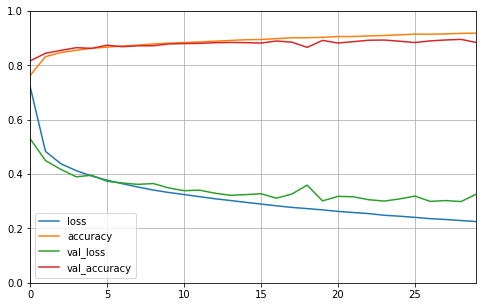

In [27]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3610996503472328, 0.8681]

In [29]:
X_new = X_test[:3]

In [30]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [31]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [32]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


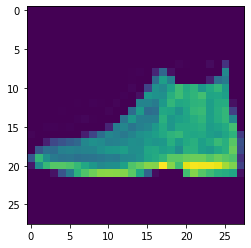

In [33]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


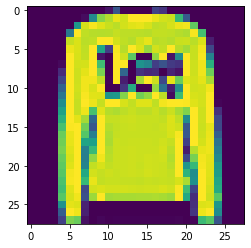

In [34]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


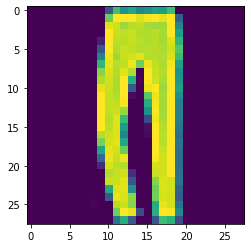

In [35]:
print(plt.imshow(X_test[2]))